In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

### Consider the grid 
### I. Define the states

In [44]:
# Parameters for the grid world
# grid_size = (5, 5)  # Define a 5x5 grid
# goal_state = (4, 4)  # Bottom-right corner as the goal
# obstacles = [(1, 2), (2, 3), (4, 1)]  # Define obstacles in some cells
# discount_factor = 0.9  # Discount factor
# threshold = 1e-4  # Convergence threshold

sz_grid = rand.randint(6,8)
grid_size = (sz_grid, sz_grid)
st_goalx = rand.randint(0,sz_grid-1)
st_goaly = rand.randint(0,sz_grid-1)
goal_state = (st_goalx, st_goaly)
obstacles = []
flag = True
nr_obst = 0
while(flag):
    obs_x = rand.randint(0,sz_grid-1)
    obs_y = rand.randint(0,sz_grid-1)
    if(obs_x != st_goalx & obs_y != st_goaly):
        if ((obs_x,obs_y) not in obstacles ):
            obstacles.append((obs_x,obs_y))
            nr_obst  = nr_obst+1
            if(nr_obst >= 7):
                flag = False

discount_factor = 0.9  # Discount factor
threshold = 1e-4  # Convergence threshold   
starting_state = (0,1)
print(obstacles)

[(3, 1), (4, 0), (5, 0), (0, 3), (0, 1), (4, 3), (1, 4)]


/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_50195/4025894278.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, j), 1, 1, color='white', edgecolor='black'))
/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_50195/4025894278.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, j), 1, 1, color='pink', edgecolor='black'))
/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_50195/4025894278.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, j), 1, 1, color='lightcoral', edgecolor='black'))
/var/folders/_b/1z83z14s1pj69nlrf9lf4gtr0000gp/T/ipykernel_50195/4025894278.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i, j), 1, 1, color='l

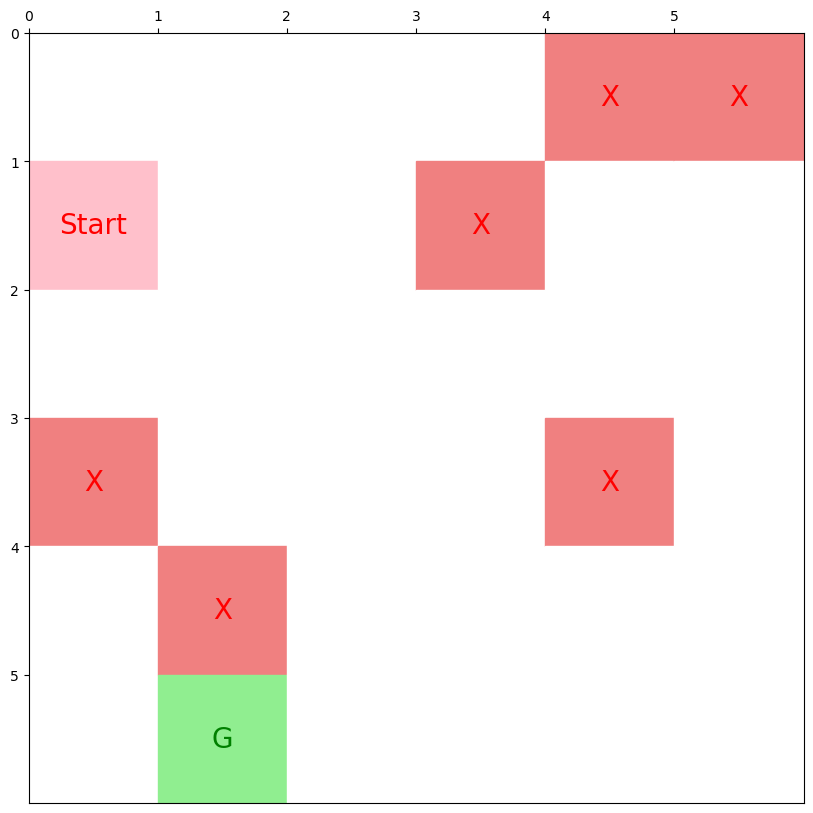

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a line of "X" labels across the top row, starting from (0,0)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Define the starting state
        if (i, j) == starting_state:
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color='pink', edgecolor='black'))
            ax.text(i + 0.5, j + 0.5, 'Start', ha='center', va='center', color='red', fontsize=20)
        # Define the goal state
        elif (i, j) == goal_state:
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color='lightgreen', edgecolor='black'))
            ax.text(i + 0.5, j + 0.5, 'G', ha='center', va='center', color='green', fontsize=20)
        # Place "X" labels in a row across the top of the grid
        elif (i,j) in obstacles:  # Place "X" only in the top row (i = 0)
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color='lightcoral', edgecolor='black'))
            ax.text(i + 0.5, j + 0.5, 'X', ha='center', va='center', color='red', fontsize=20)
        # Define other cells
        else:
            ax.add_patch(plt.Rectangle((i, j), 1, 1, color='white', edgecolor='black'))

# Set the plot limits and invert the y-axis to place (0,0) at the top-left
ax.set_xlim(0, grid_size[1])
ax.set_ylim(0, grid_size[0])
plt.gca().invert_yaxis()

# Move x-axis to the top
ax.xaxis.set_ticks_position('top')  # Set x-axis ticks to the top
ax.xaxis.set_label_position('top')  # Set x-axis label position to the top

# Set grid and labels
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))

plt.show()


### II. Define the actions, transition probabilities, and reward function.

In [46]:
# Define the actions and their corresponding moves
actions = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}

# Initialize value function and reward grid
value_function = np.zeros(grid_size)
reward_grid = np.zeros(grid_size)

# Assign rewards in the grid
reward_grid[goal_state] = 1
for obs in obstacles:
    reward_grid[obs] = -1

penalty_for_invalid_move = -1

In [47]:
# Check if a state is within grid bounds and not an obstacle
def is_valid_state(state):
    i, j = state
    x = 0 <= i < grid_size[0] and 0 <= j < grid_size[1] and state not in obstacles
    return x

# Apply value iteration to find the optimal value function
def value_iteration():
    while True:
        delta = 0
        
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                if i == starting_state[0] and j < starting_state[1]:
                    continue
                state = (i, j)
                print("State",state)
                if state == goal_state or state in obstacles:
                    continue  # Skip goal and obstacle states

                v = value_function[i, j]
                max_value = float('-inf')

                # Compute the value for each action
                for action in actions.values():
                    next_state = (i + action[0], j + action[1])
                    if is_valid_state(next_state):
                        value = reward_grid[next_state] + discount_factor * value_function[next_state]
                    else:
                        value = penalty_for_invalid_move + discount_factor * value_function[state]
                        
                    print("Next state: ", next_state, " with the value: ", value)
                    max_value = max(max_value, value)

                value_function[i, j] = max_value
                delta = max(delta, abs(v - max_value))
                print("Max value: ", max_value , " and the delta value: ", delta)

        if delta < threshold:
            break

# Run value iteration
value_iteration()

# Step 3: Extract the optimal policy
policy = np.full(grid_size, '', dtype=object)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        state = (i, j)
        if state == goal_state or state in obstacles:
            continue

        best_action = None
        best_value = float('-inf')

        for action_name, action in actions.items():
            next_state = (i + action[0], j + action[1])
            if is_valid_state(next_state):
                value = reward_grid[next_state] + discount_factor * value_function[next_state]
            else:
                value = reward_grid[state] + discount_factor * value_function[state]

            if value > best_value:
                best_value = value
                best_action = action_name

        policy[i, j] = best_action




State (0, 1)
State (0, 2)
Next state:  (-1, 2)  with the value:  -1.0
Next state:  (1, 2)  with the value:  0.0
Next state:  (0, 1)  with the value:  -1.0
Next state:  (0, 3)  with the value:  -1.0
Max value:  0.0  and the delta value:  0
State (0, 3)
State (0, 4)
Next state:  (-1, 4)  with the value:  -1.0
Next state:  (1, 4)  with the value:  -1.0
Next state:  (0, 3)  with the value:  -1.0
Next state:  (0, 5)  with the value:  0.0
Max value:  0.0  and the delta value:  0
State (0, 5)
Next state:  (-1, 5)  with the value:  -1.0
Next state:  (1, 5)  with the value:  1.0
Next state:  (0, 4)  with the value:  0.0
Next state:  (0, 6)  with the value:  -1.0
Max value:  1.0  and the delta value:  1.0
State (1, 0)
Next state:  (0, 0)  with the value:  0.0
Next state:  (2, 0)  with the value:  0.0
Next state:  (1, -1)  with the value:  -1.0
Next state:  (1, 1)  with the value:  0.0
Max value:  0.0  and the delta value:  1.0
State (1, 1)
Next state:  (0, 1)  with the value:  -1.0
Next state:  

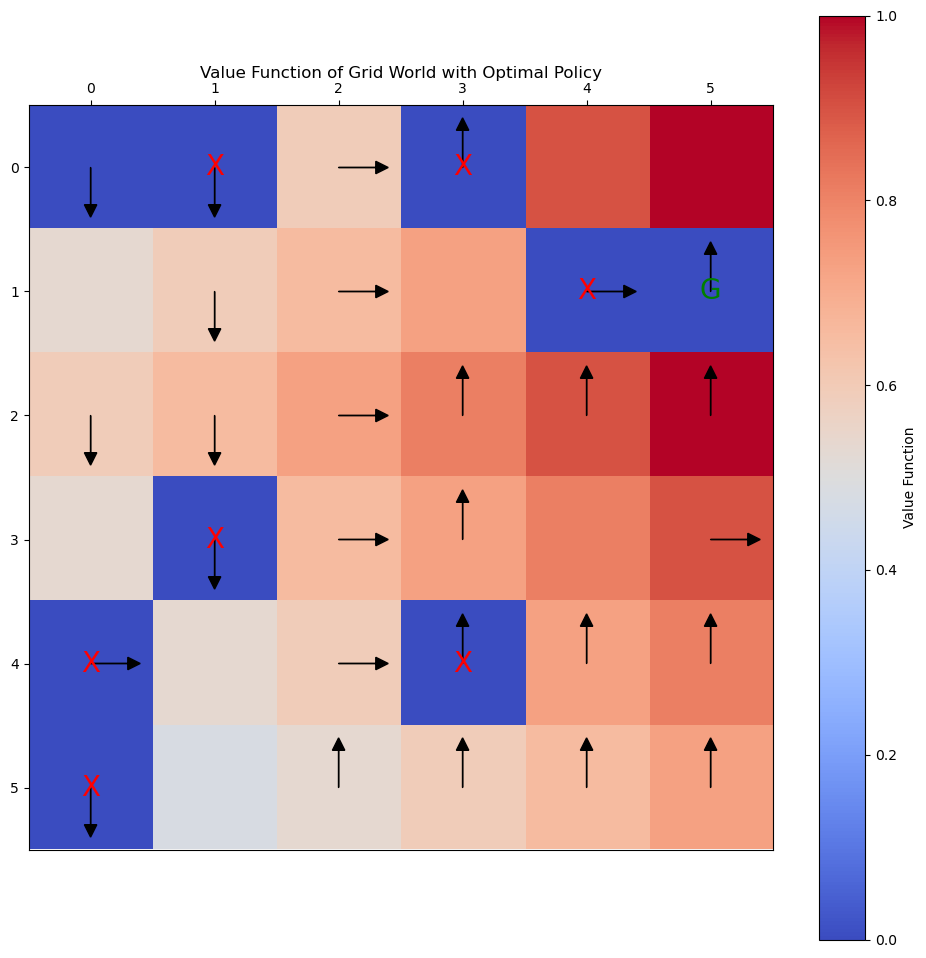

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))

# Display the value function with the top-left as the origin
cax = ax.imshow(value_function, cmap='coolwarm', origin='upper')
fig.colorbar(cax, label="Value Function")
ax.set_title("Value Function of Grid World with Optimal Policy", pad=20)  # Add padding to move the title away from the x-axis


# Overlay the optimal policy as arrows
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if policy[i, j] == 'up':
            ax.arrow(i,j, 0, -0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'down':
            ax.arrow(i,j, 0, 0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'left':
            ax.arrow(i,j, -0.3, 0, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'right':
            ax.arrow(i,j, 0.3, 0, head_width=0.1, head_length=0.1, color='black')

ax.text(goal_state[1], goal_state[0], 'G', ha='center', va='center', color='green', fontsize=20)
for obs in obstacles:
    ax.text(obs[1], obs[0], 'X', ha='center', va='center', color='red', fontsize=20)

# Adjust plot limits to display cells fully
ax.set_xlim(-0.5, grid_size[1] - 0.5)
ax.set_ylim(-0.5, grid_size[0] - 0.5)
ax.invert_yaxis()  # Set (0,0) at the top-left

# Move x-axis to the top
ax.xaxis.set_ticks_position('top')  # Set x-axis ticks to the top
ax.xaxis.set_label_position('top')  # Set x-axis label position to the top

# Set grid and labels
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))

plt.show()


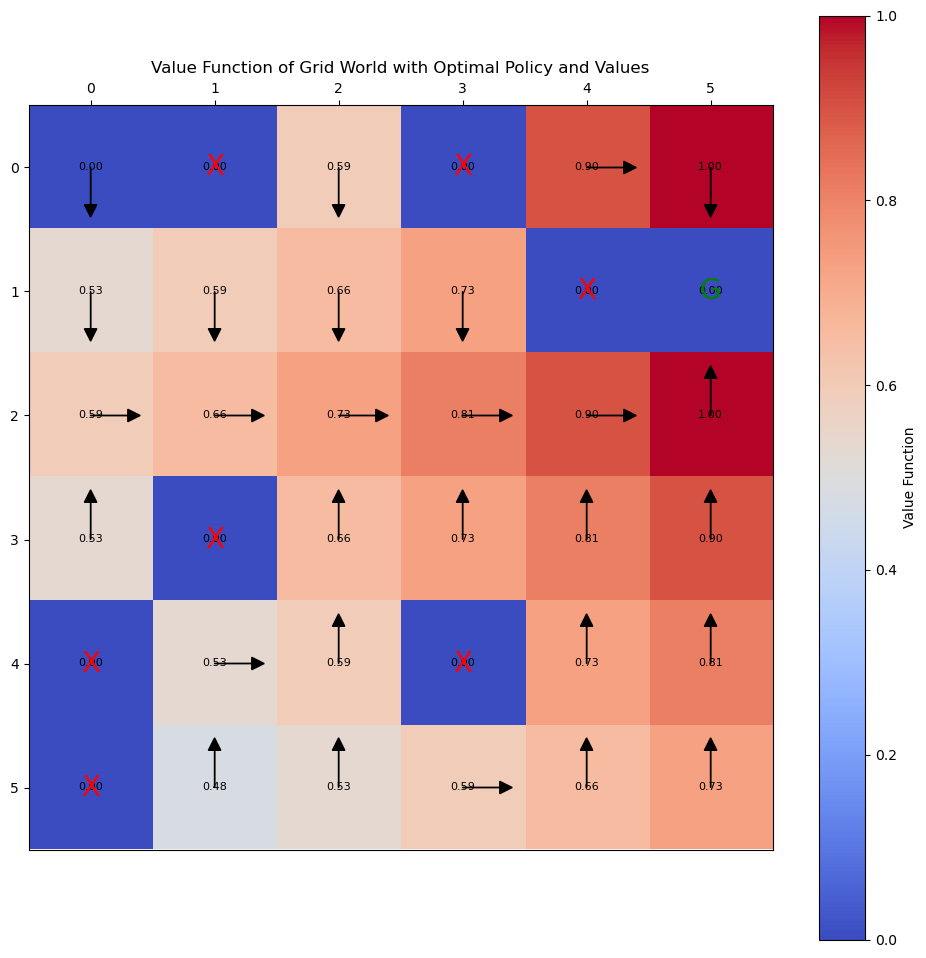

In [57]:
fig, ax = plt.subplots(figsize=(12, 12))

# Display the value function with the top-left as the origin
cax = ax.imshow(value_function, cmap='coolwarm', origin='upper')
fig.colorbar(cax, label="Value Function")
ax.set_title("Value Function of Grid World with Optimal Policy and Values")

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Display the value of each state in the cell
        plt.text(j, i, f"{value_function[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

        # Display the optimal policy direction as arrows
        if policy[i, j] == 'up':
            ax.arrow(j, i, 0, -0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'down':
            ax.arrow(j, i, 0, 0.3, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'left':
            ax.arrow(j, i, -0.3, 0, head_width=0.1, head_length=0.1, color='black')
        elif policy[i, j] == 'right':
            ax.arrow(j, i, 0.3, 0, head_width=0.1, head_length=0.1, color='black')

ax.text(goal_state[1], goal_state[0], 'G', ha='center', va='center', color='green', fontsize=20)
for obs in obstacles:
    ax.text(obs[1], obs[0], 'X', ha='center', va='center', color='red', fontsize=20)

# Adjust plot limits to display cells fully
ax.set_xlim(-0.5, grid_size[1] - 0.5)
ax.set_ylim(-0.5, grid_size[0] - 0.5)
ax.invert_yaxis()  # Set (0,0) at the top-left

# Move x-axis to the top
ax.xaxis.set_ticks_position('top')  # Set x-axis ticks to the top
ax.xaxis.set_label_position('top')  # Set x-axis label position to the top

# Set grid and labels
plt.xticks(range(grid_size[1]))
plt.yticks(range(grid_size[0]))

plt.show()